In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# EDA

### Summary Statistics

In [2]:
df = pd.read_csv('Country-data.csv')

In [3]:
df.sample(n=10) # random 10 rows from the data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334
69,India,58.8,22.600,4.05,27.1000,4410,8.980,66.2,2.60,1350
44,Denmark,4.1,50.500,11.40,43.6000,44000,3.220,79.5,1.87,58000
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897
33,Chile,8.7,37.700,7.96,31.3000,19400,8.960,79.1,1.88,12900
112,Niger,123.0,22.200,5.16,49.1000,814,2.550,58.8,7.49,348
7,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
41,Croatia,5.5,37.600,7.76,38.1000,20100,0.821,76.3,1.55,13500
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988
98,Malta,6.8,153.000,8.65,154.0000,28300,3.830,80.3,1.36,21100


In [4]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


# Distribution - Histogram

<Figure size 432x288 with 0 Axes>

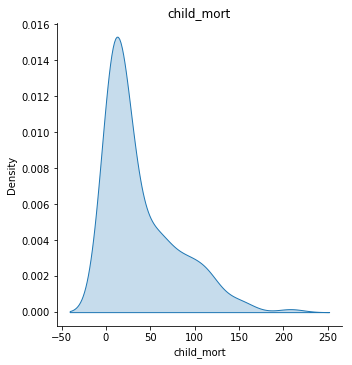

<Figure size 432x288 with 0 Axes>

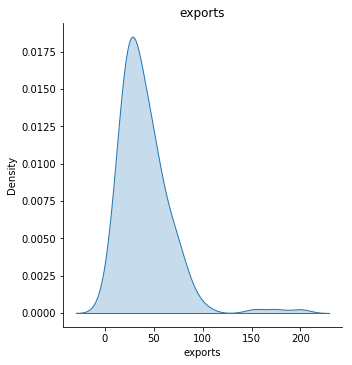

<Figure size 432x288 with 0 Axes>

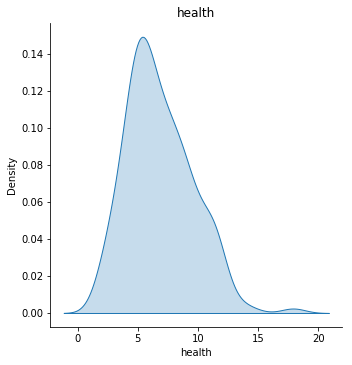

<Figure size 432x288 with 0 Axes>

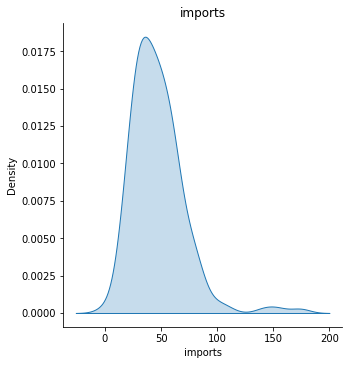

<Figure size 432x288 with 0 Axes>

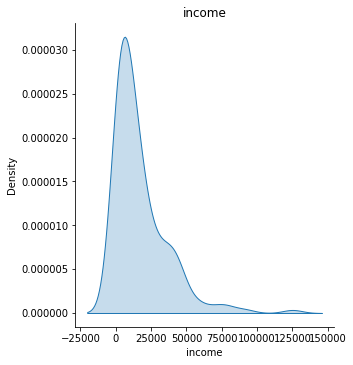

<Figure size 432x288 with 0 Axes>

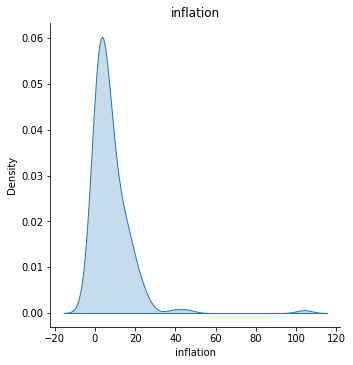

<Figure size 432x288 with 0 Axes>

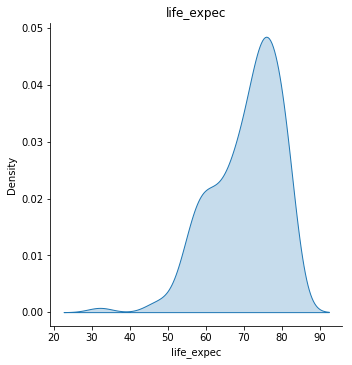

<Figure size 432x288 with 0 Axes>

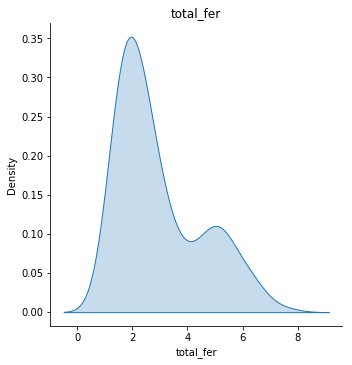

<Figure size 432x288 with 0 Axes>

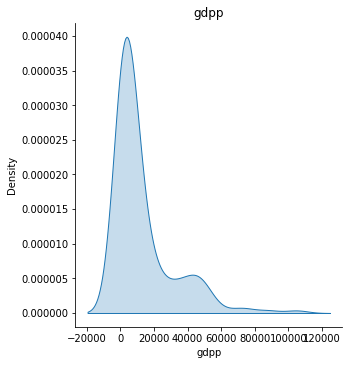

In [9]:
for x in [x for x in df.columns if type(df[x][0])!=str]:
    plt.figure()
    sns.displot(df, x=df[x],kind='kde', fill=True, palette='Paired')
    #df[i].hist(bins=20)
    #sns.distplot(df[i],bins=20)
    plt.title(x)
    plt.show()

# Check outliers - Boxplot

In [10]:
# Features of smilar scales grouped together for better visibility
features_1 = [
    'income', 'gdpp'
]

features_2 = [
    'child_mort', 'exports','imports',
    'inflation', 'life_expec'
]

features_3 = [
    'health','total_fer'
]

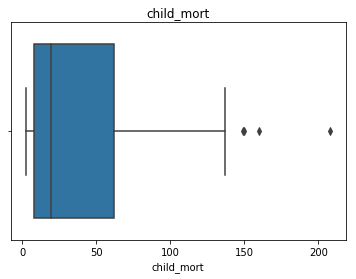

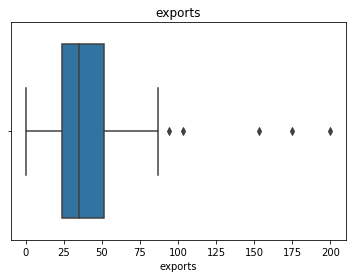

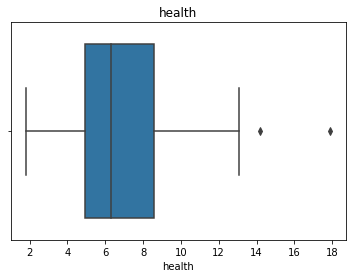

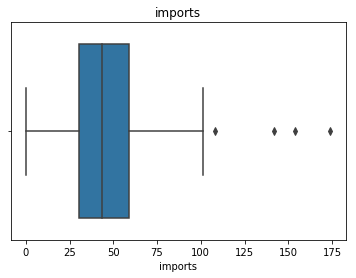

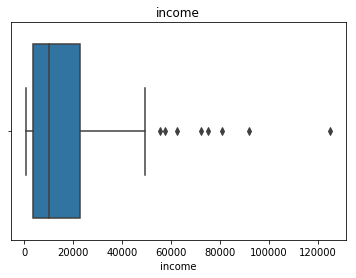

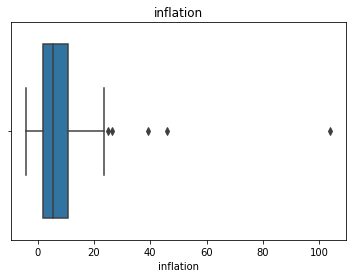

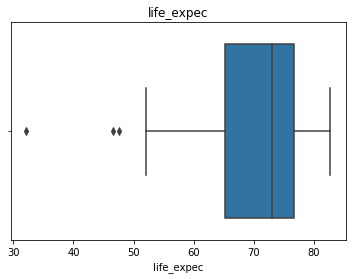

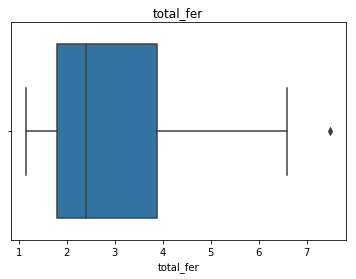

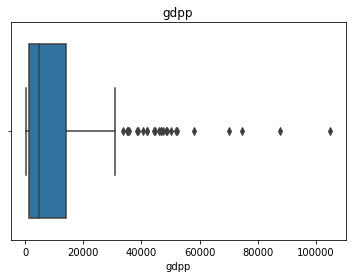

In [11]:
for i in [x for x in df.columns if type(df[x][0])!=str]:
    plt.figure()
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

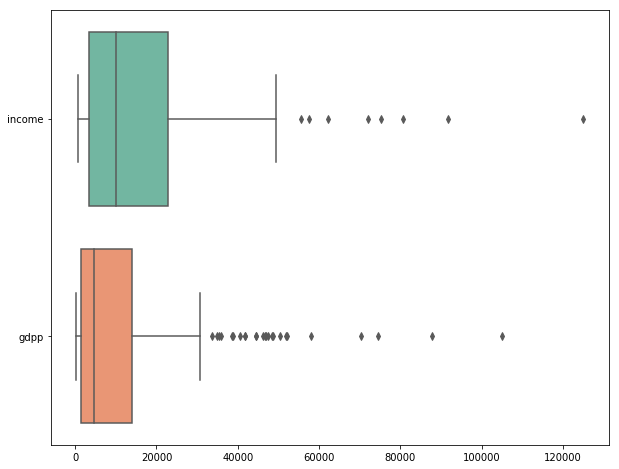

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[features_1], orient="h", palette="Set2")

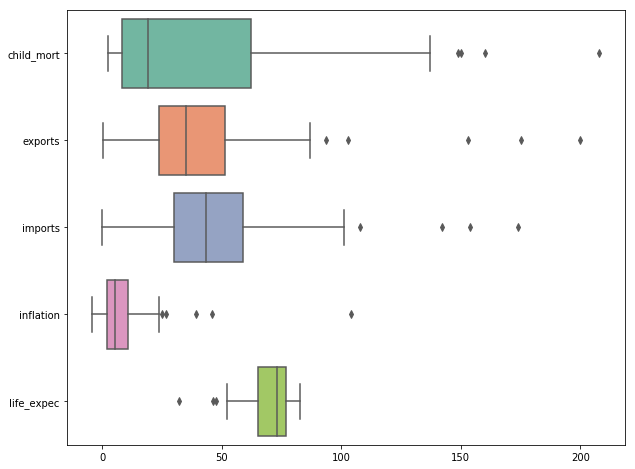

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[features_2], orient="h", palette="Set2")

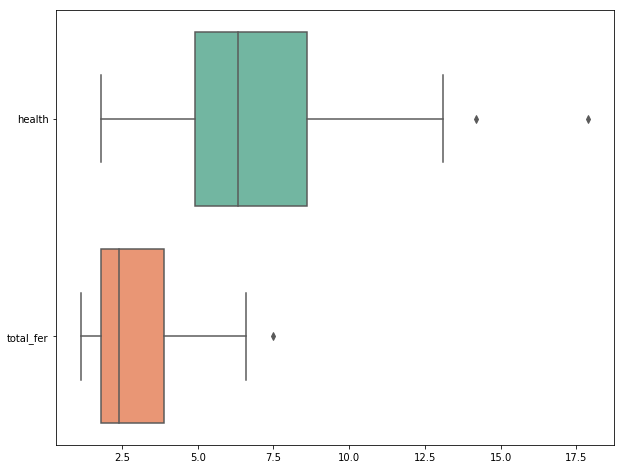

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[features_3], orient="h", palette="Set2")

# Pairwise Correlation - Scatterplot

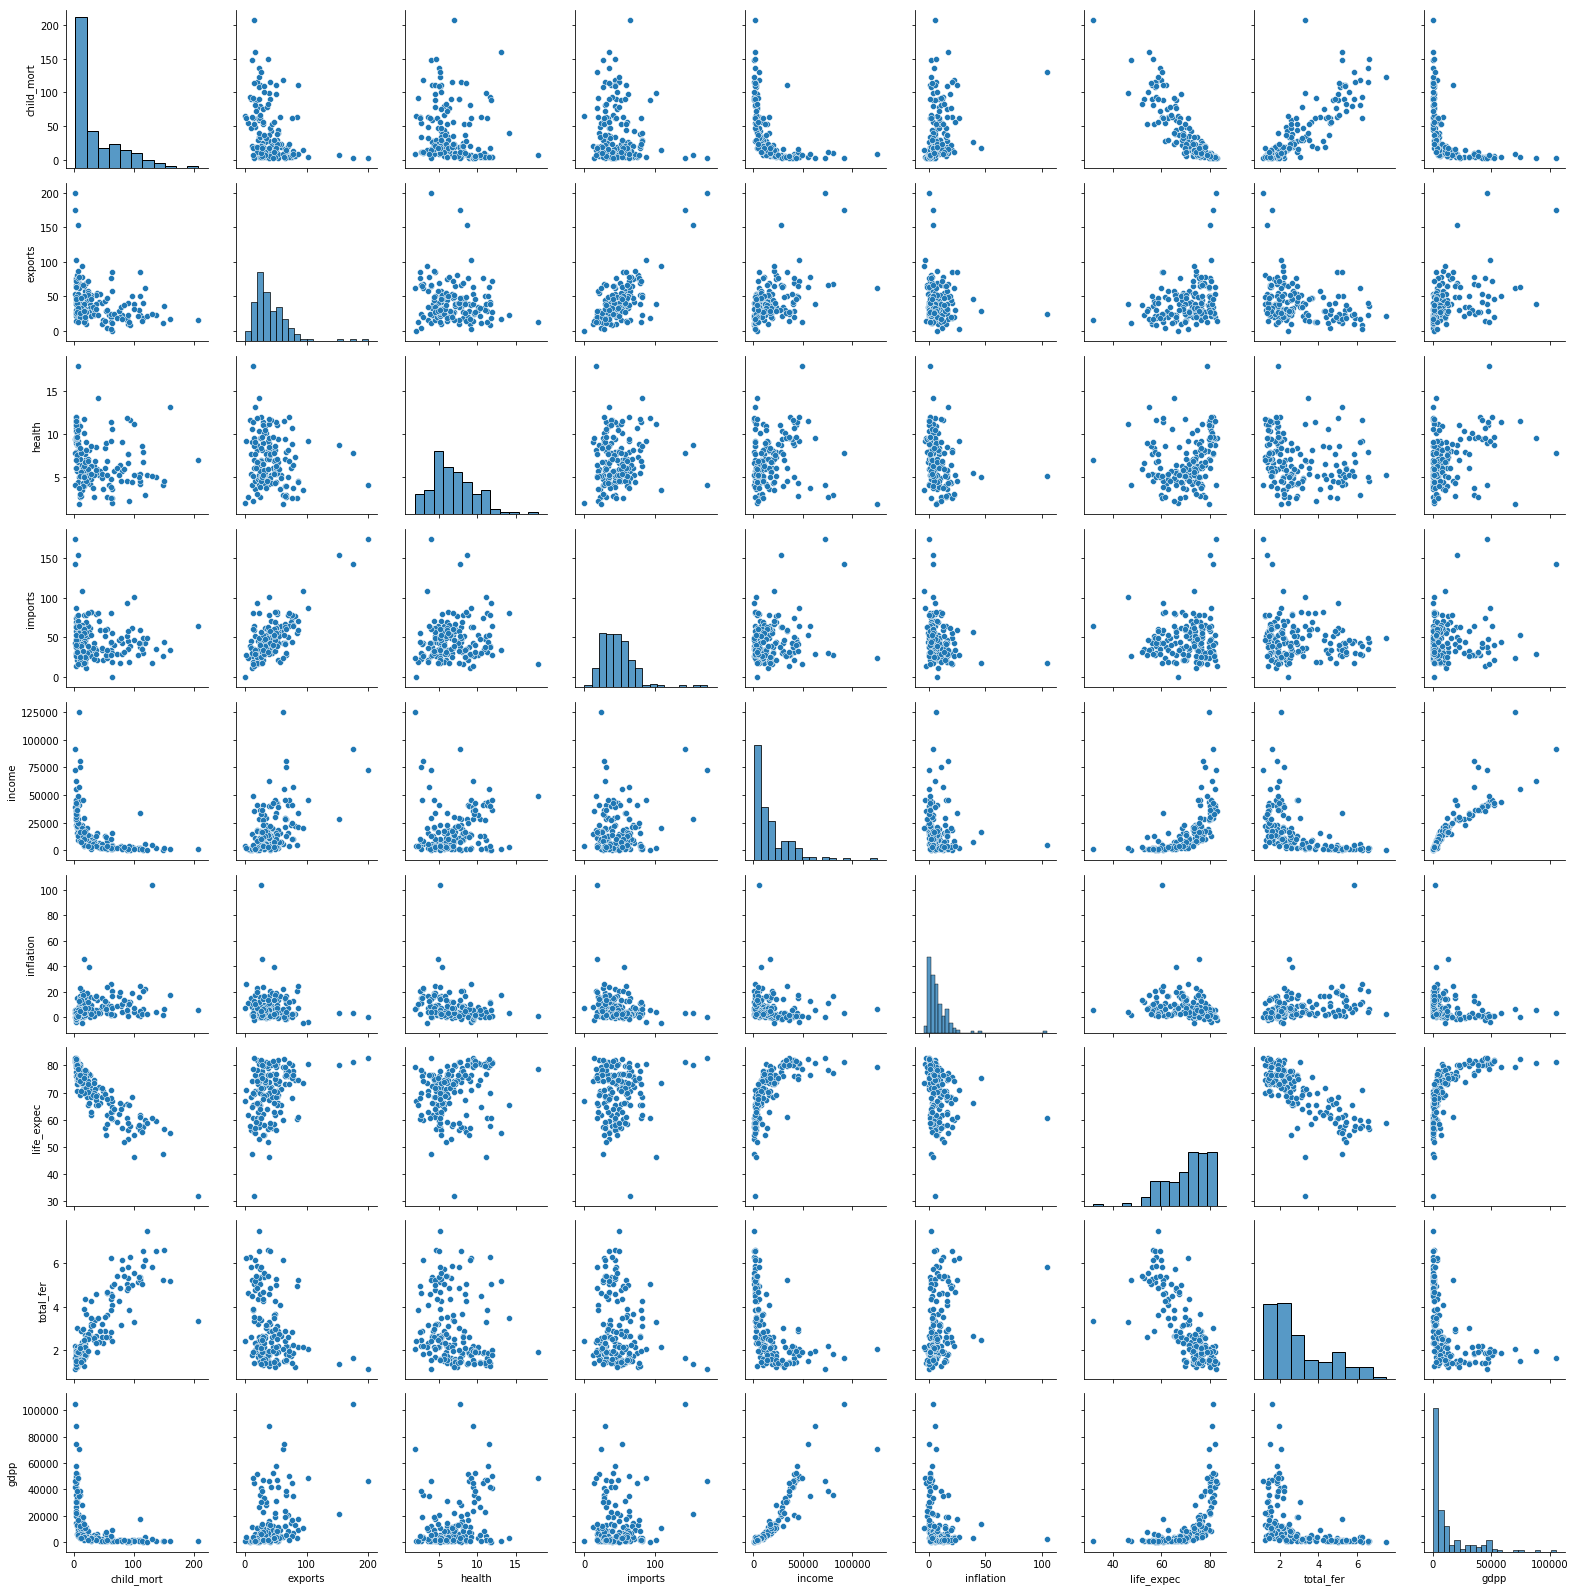

In [15]:
sns.pairplot(df)

## Heatmap

In [16]:
features = [
    'child_mort', 'exports', 'health','imports',
    'income', 'inflation', 'life_expec', 'total_fer',
    'gdpp'
]

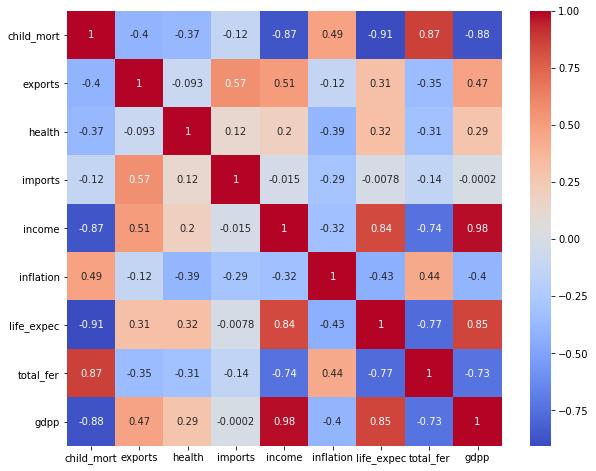

In [17]:
df_corr = df[features].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, square=True, cmap='coolwarm', annot=True);

# Triangle - Heat map

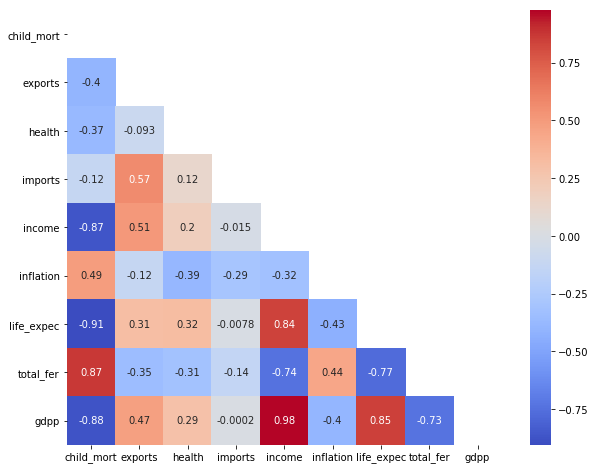

In [18]:
df_corr = df[features].corr(method='spearman')
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, mask=mask, square=True, cmap='coolwarm', annot=True);

# Correlation - Scatterplot

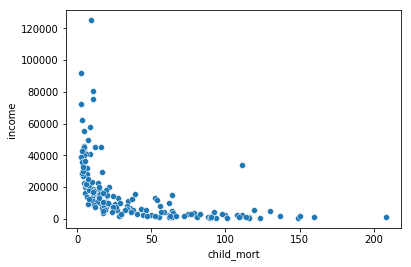

In [19]:
sns.scatterplot(data=df, x='child_mort',y='income')
#sns.regplot(x=df['child_mort'],y=df['income'],fit_reg=False)

## Check Missing

In [20]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [21]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Normalization

In [22]:
X  =df.iloc[:,1:].copy()

In [23]:
sc = StandardScaler()
df_norm = sc.fit_transform(X)

# Hierarchical Clustering

## Dendrogram

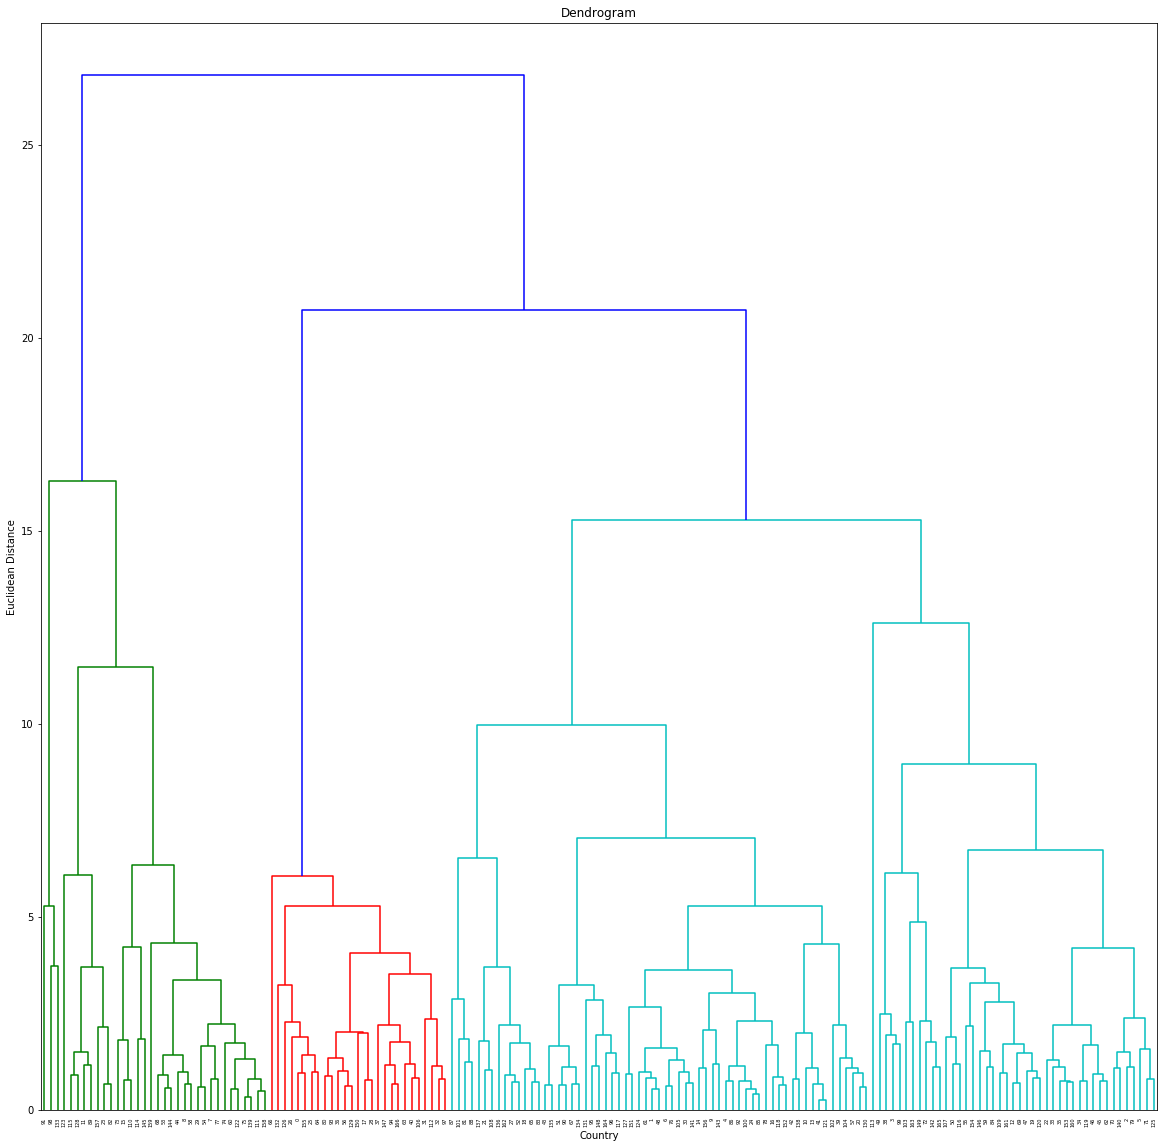

In [24]:
import scipy.cluster.hierarchy as sch
f = plt.figure() 
f.set_figwidth(20) 
f.set_figheight(20)
dendrogram = sch.dendrogram(sch.linkage(df_norm,method='ward'))

plt.title('Dendrogram')
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.show()

### By looking at the dendrogram, the optimal cluster could be 3

In [25]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_norm)

#add extra column for culster values
df['hc_label'] = hc.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hc_label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [26]:
df['hc_label'].value_counts()

1    106
0     34
2     27
Name: hc_label, dtype: int64

# relook at variables by different HC labels

In [27]:
def create_pivot(df,index,values, aggfunc, columns=None):
    plt.figure()
    pvt = df.pivot_table(index=index,values=values, aggfunc=aggfunc)
    pvt
    pvt.plot(kind='bar').legend()
    plt.title(values[0])
    plt.show()

<Figure size 432x288 with 0 Axes>

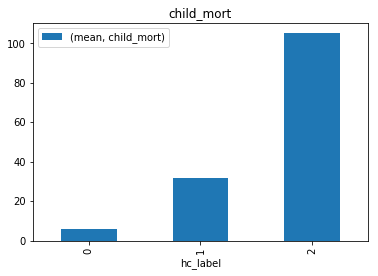

<Figure size 432x288 with 0 Axes>

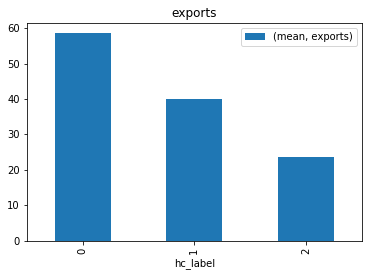

<Figure size 432x288 with 0 Axes>

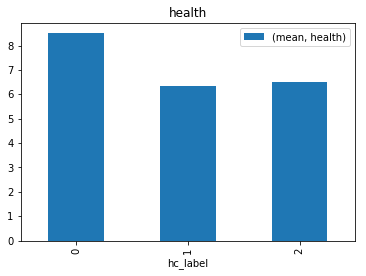

<Figure size 432x288 with 0 Axes>

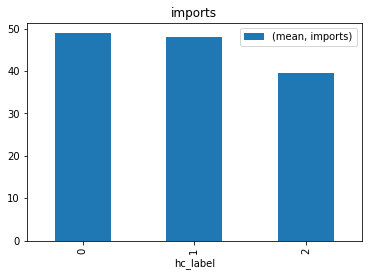

<Figure size 432x288 with 0 Axes>

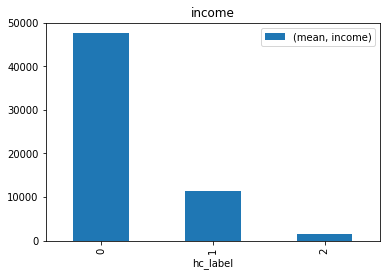

<Figure size 432x288 with 0 Axes>

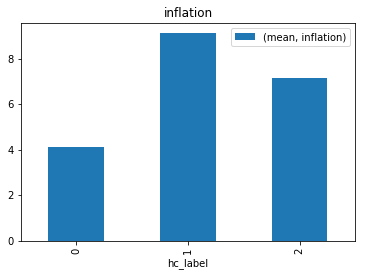

<Figure size 432x288 with 0 Axes>

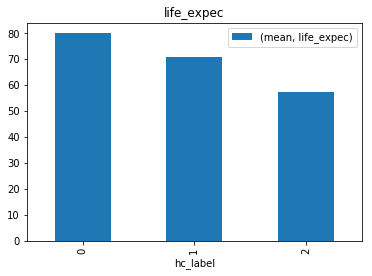

<Figure size 432x288 with 0 Axes>

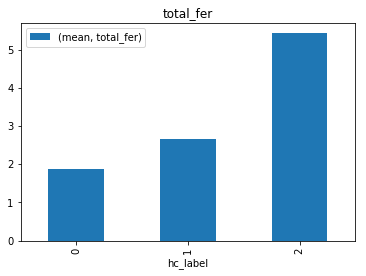

<Figure size 432x288 with 0 Axes>

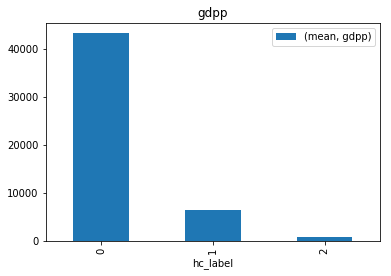

In [28]:
for i in df.columns[1:len(df.columns)-1]:
    create_pivot(df,index=['hc_label'],values=[i], aggfunc=['mean'])

# K-Means Clustering

## Optimal number of clusters - elbow graph

In [31]:
# to choose optimal number of clusters, we need to calculate within cluster sum of squares 

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=7)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

### Elbow Graph

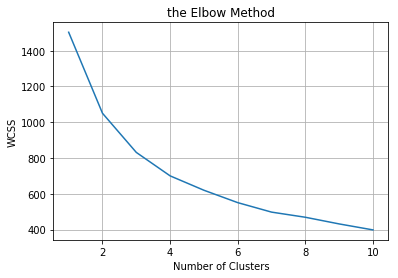

In [32]:
plt.plot(range(1, 11), wcss)
plt.title('the Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## By looking at the elbow graph, the optimal cluster could be 3

In [33]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 7)
y_kmeans = kmeans.fit_predict(df_norm)

df['kmeans_label'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hc_label,kmeans_label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


<Figure size 432x288 with 0 Axes>

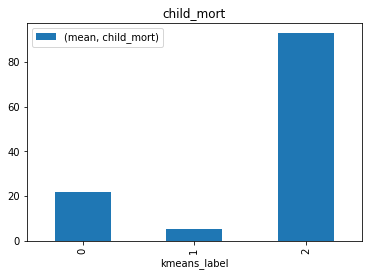

<Figure size 432x288 with 0 Axes>

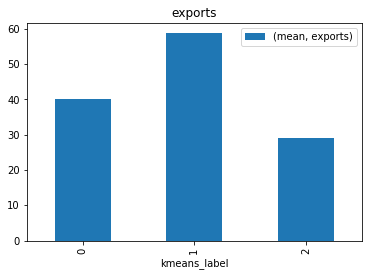

<Figure size 432x288 with 0 Axes>

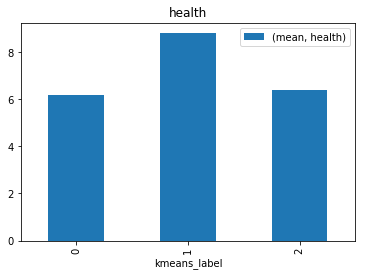

<Figure size 432x288 with 0 Axes>

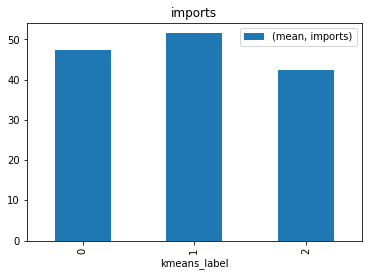

<Figure size 432x288 with 0 Axes>

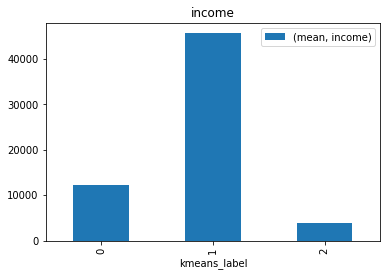

<Figure size 432x288 with 0 Axes>

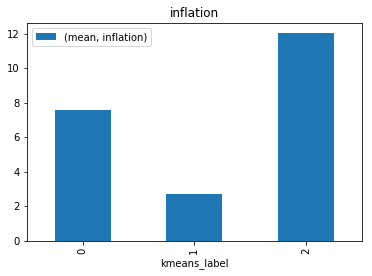

<Figure size 432x288 with 0 Axes>

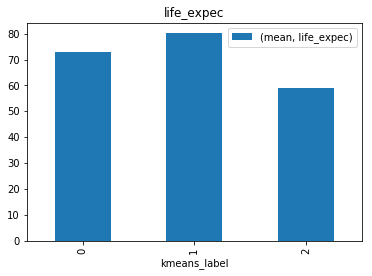

<Figure size 432x288 with 0 Axes>

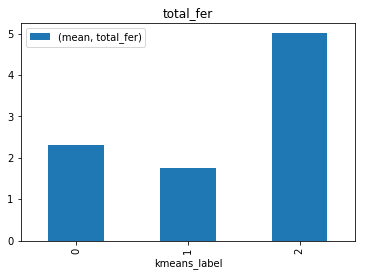

<Figure size 432x288 with 0 Axes>

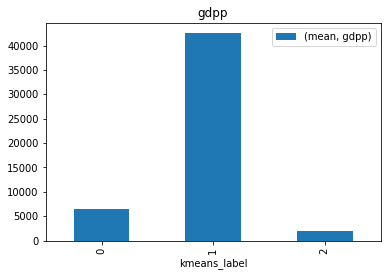

In [34]:
for i in df.columns[1:len(df.columns)-2]:
    create_pivot(df,index=['kmeans_label'],values=[i], aggfunc=['mean'])

# Visualisation

### Hirarchical Clustering

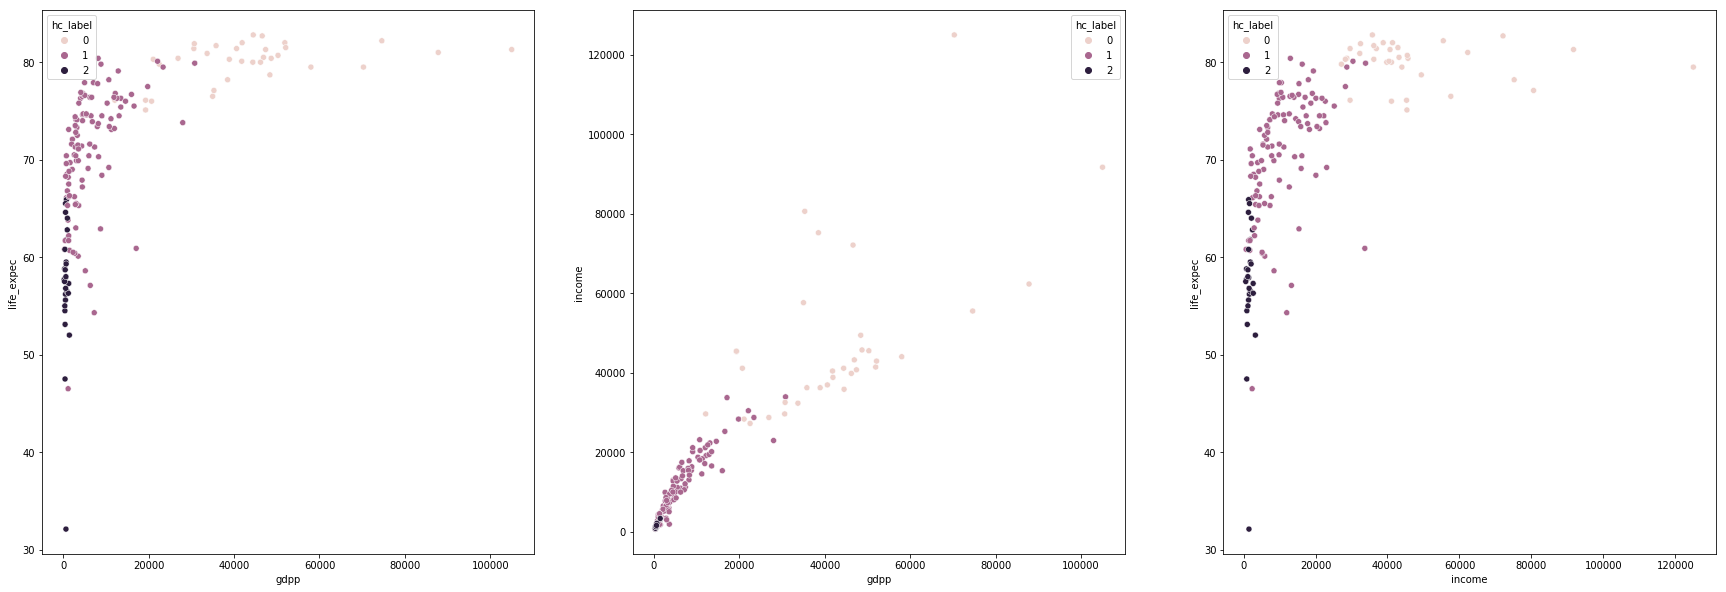

In [35]:
fig, axs = plt.subplots(1,3, figsize = (30,10))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x="gdpp", y="life_expec", hue="hc_label")

plt.subplot(1,3,2)
sns.scatterplot(data=df, x="gdpp", y="income", hue="hc_label")

plt.subplot(1,3,3)
sns.scatterplot(data=df, x="income", y="life_expec", hue="hc_label")

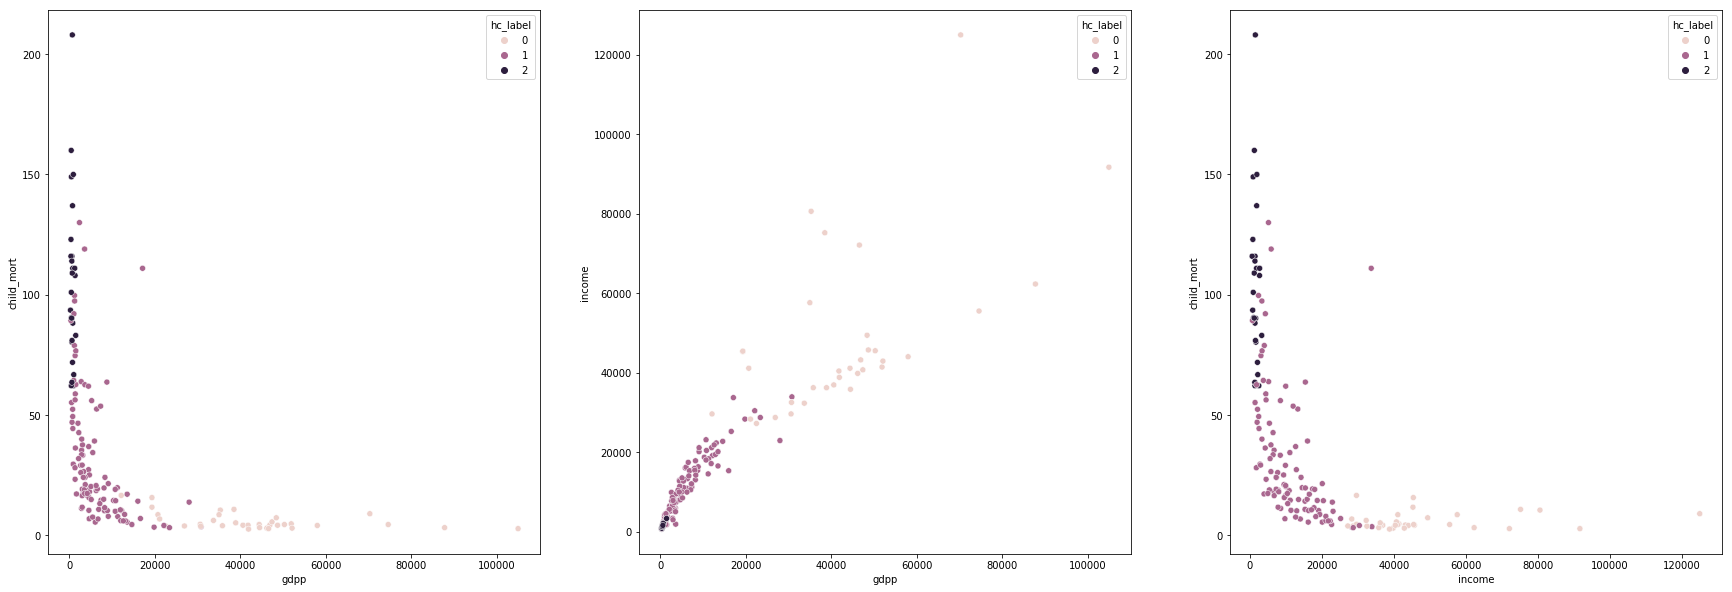

In [36]:
fig, axs = plt.subplots(1,3, figsize = (30,10))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x="gdpp", y="child_mort", hue="hc_label")

plt.subplot(1,3,2)
sns.scatterplot(data=df, x="gdpp", y="income", hue="hc_label")

plt.subplot(1,3,3)
sns.scatterplot(data=df, x="income", y="child_mort", hue="hc_label")

In [37]:
df[df['hc_label']==2].sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).head(n=10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hc_label,kmeans_label
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2,2
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,2,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,2,2
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,2,2
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2,2
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2,2
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,2,2
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,2,2


# Wealth Countries

In [38]:
df[df['hc_label']==0].head(n=10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hc_label,kmeans_label
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,0,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,0,1


# Median Wealth Countries

In [39]:
df[df['hc_label']==1].head(n=10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hc_label,kmeans_label
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1,0
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,1,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,1,0


# Poor Countries

In [40]:
df[df['hc_label']==2].head(n=10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hc_label,kmeans_label
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2,2
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220,2,2


In [41]:
df['hc_label'].value_counts()

1    106
0     34
2     27
Name: hc_label, dtype: int64

# KMeans

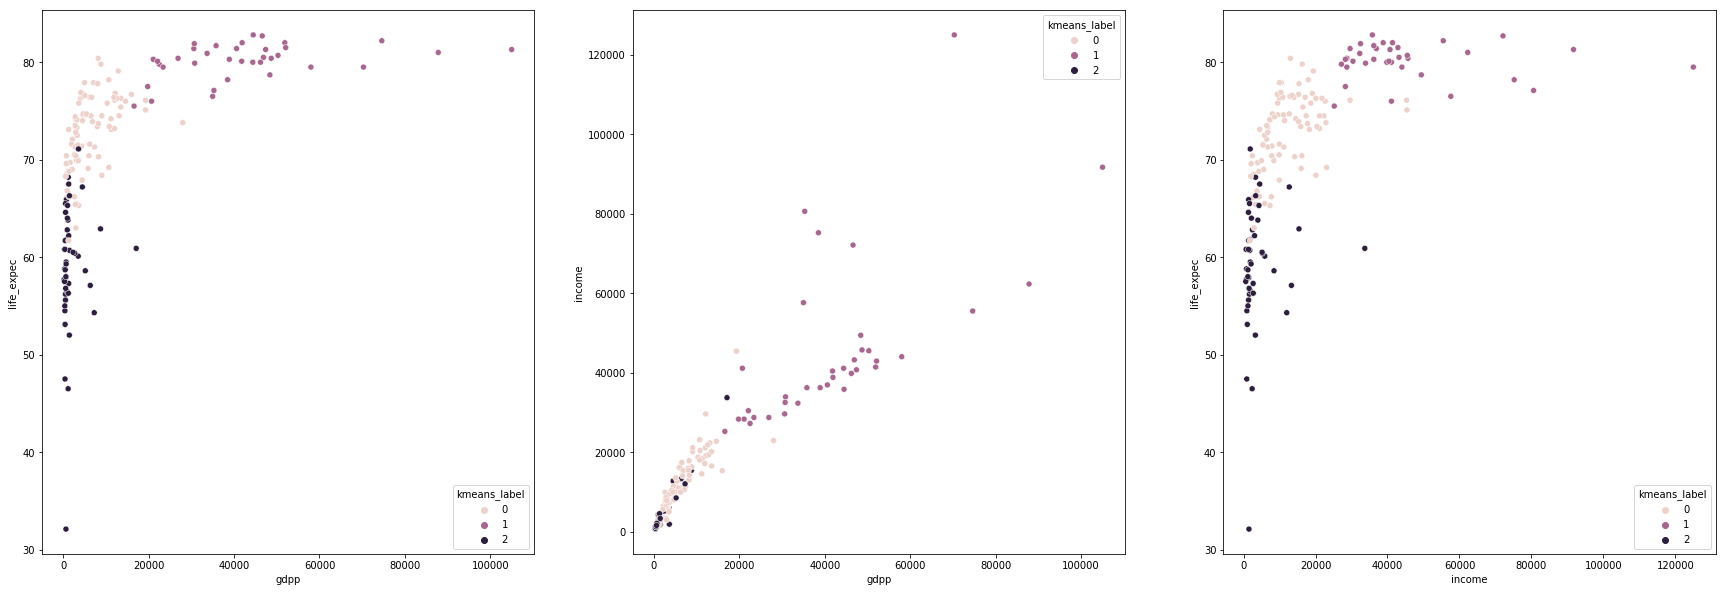

In [42]:
fig, axs = plt.subplots(1,3, figsize = (30,10))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x="gdpp", y="life_expec", hue="kmeans_label")

plt.subplot(1,3,2)
sns.scatterplot(data=df, x="gdpp", y="income", hue="kmeans_label")

plt.subplot(1,3,3)
sns.scatterplot(data=df, x="income", y="life_expec", hue="kmeans_label")

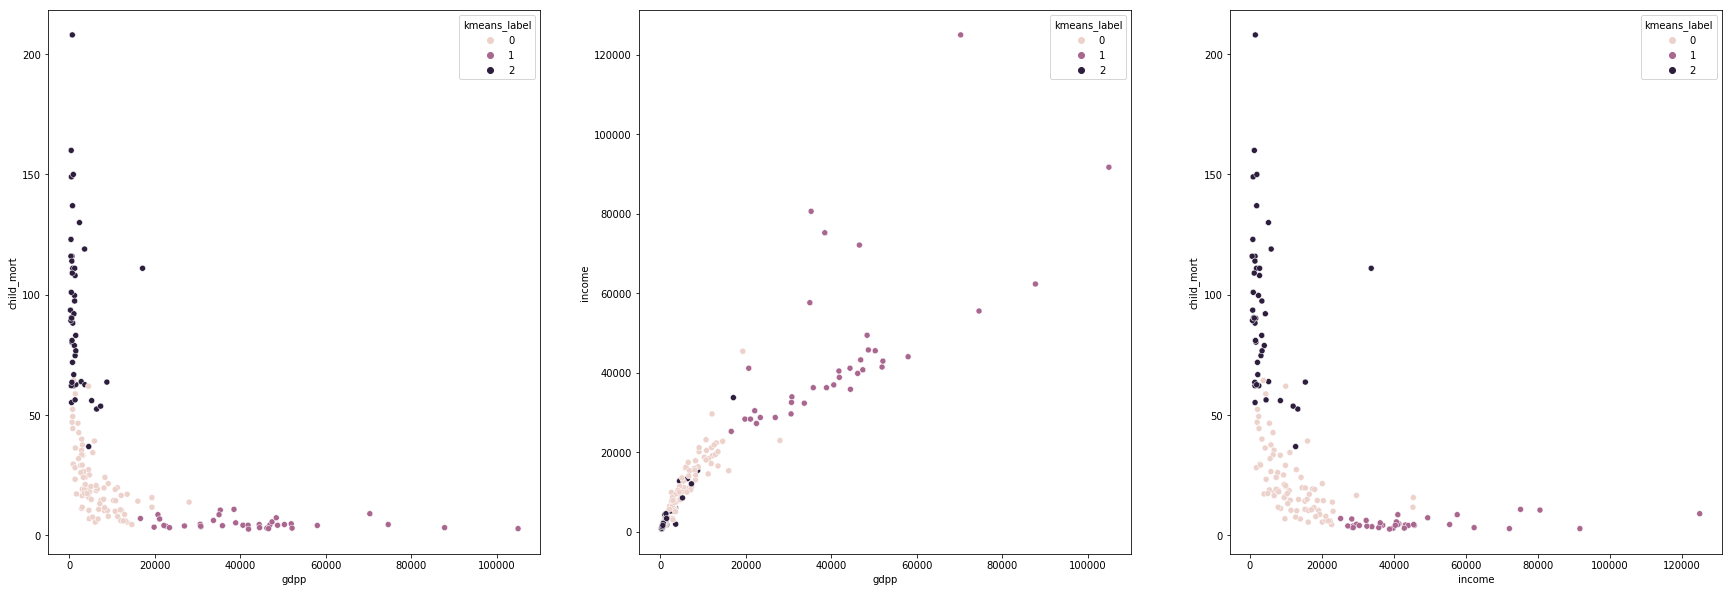

In [43]:
fig, axs = plt.subplots(1,3, figsize = (30,10))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x="gdpp", y="child_mort", hue="kmeans_label")

plt.subplot(1,3,2)
sns.scatterplot(data=df, x="gdpp", y="income", hue="kmeans_label")

plt.subplot(1,3,3)
sns.scatterplot(data=df, x="income", y="child_mort", hue="kmeans_label")

In [44]:
df[df['kmeans_label']==2].sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).head(n=10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hc_label,kmeans_label
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2,2
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2,2
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,2,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,2,2
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,2,2
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2,2
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2,2
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,1,2


# Wealth Countries

In [45]:
df['kmeans_label'].value_counts()

0    84
2    47
1    36
Name: kmeans_label, dtype: int64

In [46]:
df[df['kmeans_label']==1].head(n=10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hc_label,kmeans_label
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0,1


# Median Countries

In [47]:
df[df['kmeans_label']==0].head(n=10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hc_label,kmeans_label
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1,0
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,1,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,1,0
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,1,0


# Poor Countries

In [48]:
df[df['kmeans_label']==2].head(n=10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hc_label,kmeans_label
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2,2
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2,2
